<a href="https://colab.research.google.com/github/DITHAAAA/Stupen_Batch5/blob/main/Sesi_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from PIL import Image
import folium

from wordcloud import WordCloud, STOPWORDS

mpl.style.use('ggplot')

%matplotlib inline

print('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.7.1


## **Ingesting Data**

In [2]:
df_can = pd.read_excel(
    'https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

In [5]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [6]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [7]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] =  df_can.loc[:, '1980':'2013'].sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
# years = list(df_can.loc[:, '1980':'2013'].columns)
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


## **Waffle Charts**

In [8]:
df_dsn = df_can.loc[["Denmark", "Norway", "Sweden"], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [9]:
total_values = sum(df_dsn["Total"])
category_proportions = [value / total_values for value in df_dsn["Total"]]

for i, proportion in enumerate(category_proportions):
    print(f"{df_dsn.index[i]}: {proportion * 100:.2f}%")

Denmark: 32.26%
Norway: 19.24%
Sweden: 48.50%


In [10]:
width = 40
height = 10

total_num_tiles = width * height
print("Total number of tiles is", total_num_tiles)

Total number of tiles is 400


In [11]:
list_a = []
for i in category_proportions:
    list_a.append(round(i * 400))

list_a = [(round(i * 400)) for i in category_proportions]

[i * 10 for i in list_a]

[1290, 770, 1940]

In [12]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print(f"{df_dsn.index[i]}: {tiles}")

Denmark: 129
Norway: 77
Sweden: 194


In [13]:
dict(zip(df_dsn.index, tiles_per_category))

{'Denmark': 129, 'Norway': 77, 'Sweden': 194}

In [14]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1

        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1

        waffle_chart[row, col] = category_index

print("Waffle chart populated!")

Waffle chart populated!


In [15]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 640x480 with 0 Axes>

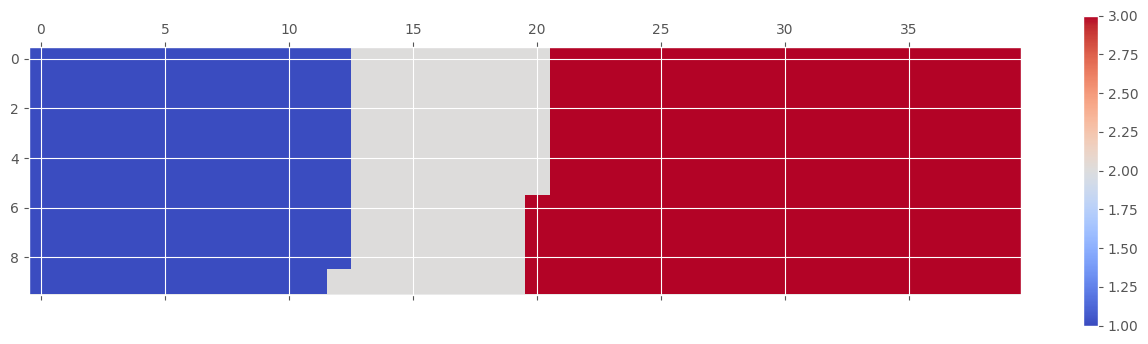

In [16]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

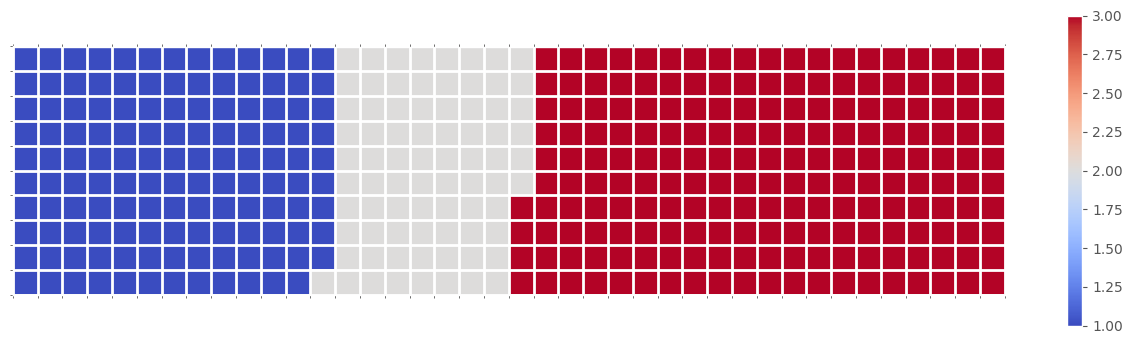

In [17]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 640x480 with 0 Axes>

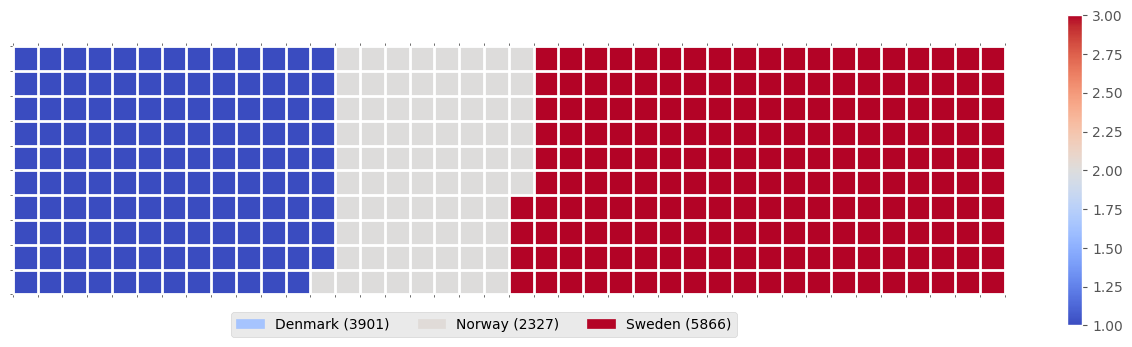

In [18]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

plt.show()

## **Word Clouds**

In [19]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O data/al

data/al: No such file or directory


In [20]:
# open the file and read it into a variable alice_novel
with open('alice_novel.txt', 'r') as f:
    alice_novel = f.read()

print ('File downloaded and saved!')

File downloaded and saved!


In [21]:
print(alice_novel)

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictur

In [22]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=STOPWORDS
)

alice_wc.generate(alice_novel)

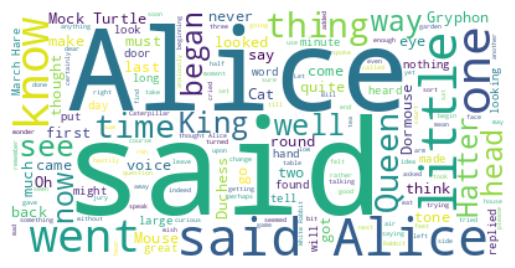

In [23]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

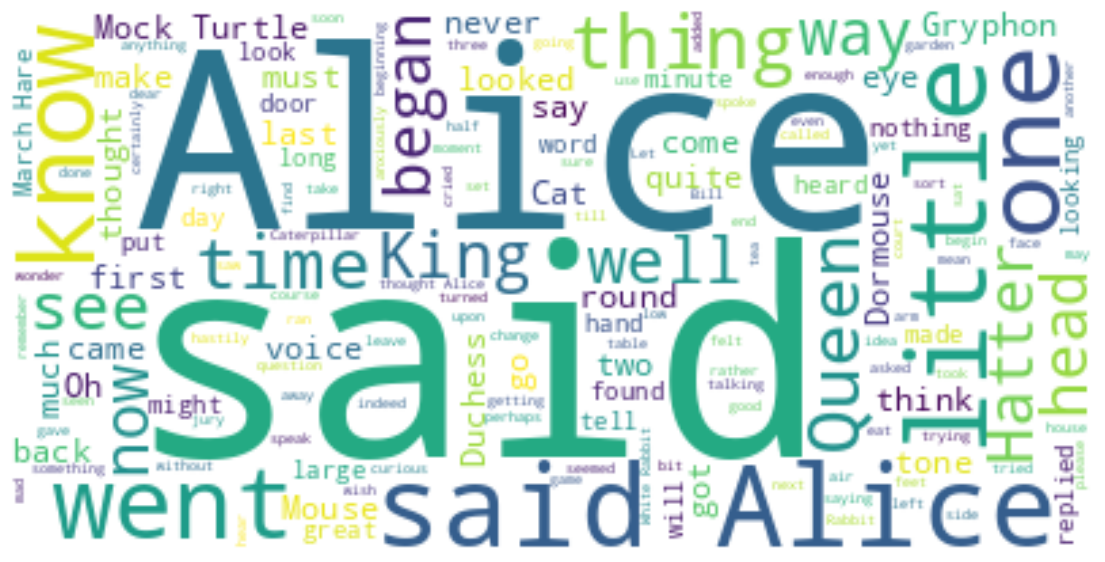

In [24]:
# fig = plt.figure(figsize=(14, 18))
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

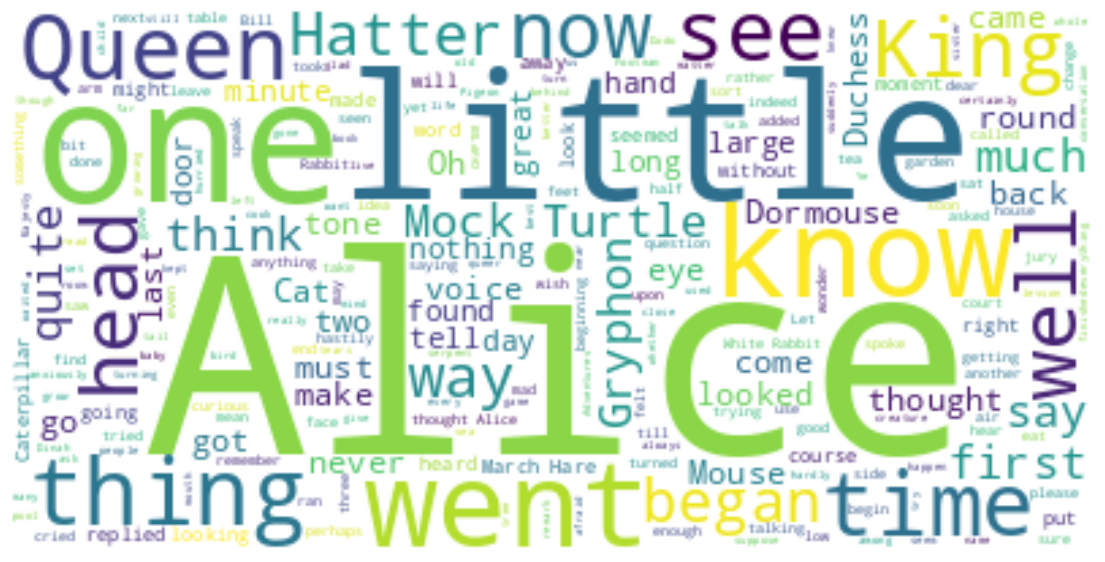

In [25]:
STOPWORDS.add('said')

alice_wc.generate(alice_novel)

# fig = plt.figure(figsize=(14, 18))
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# download image
!wget --quiet https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png -O data/alice_mask.png

data/alice_mask.png: No such file or directory


In [27]:
alice_mask = np.array(Image.open("alice_mask.png"))

In [28]:
alice_mask.shape

(900, 900)

In [29]:
alice_mask.ndim

2

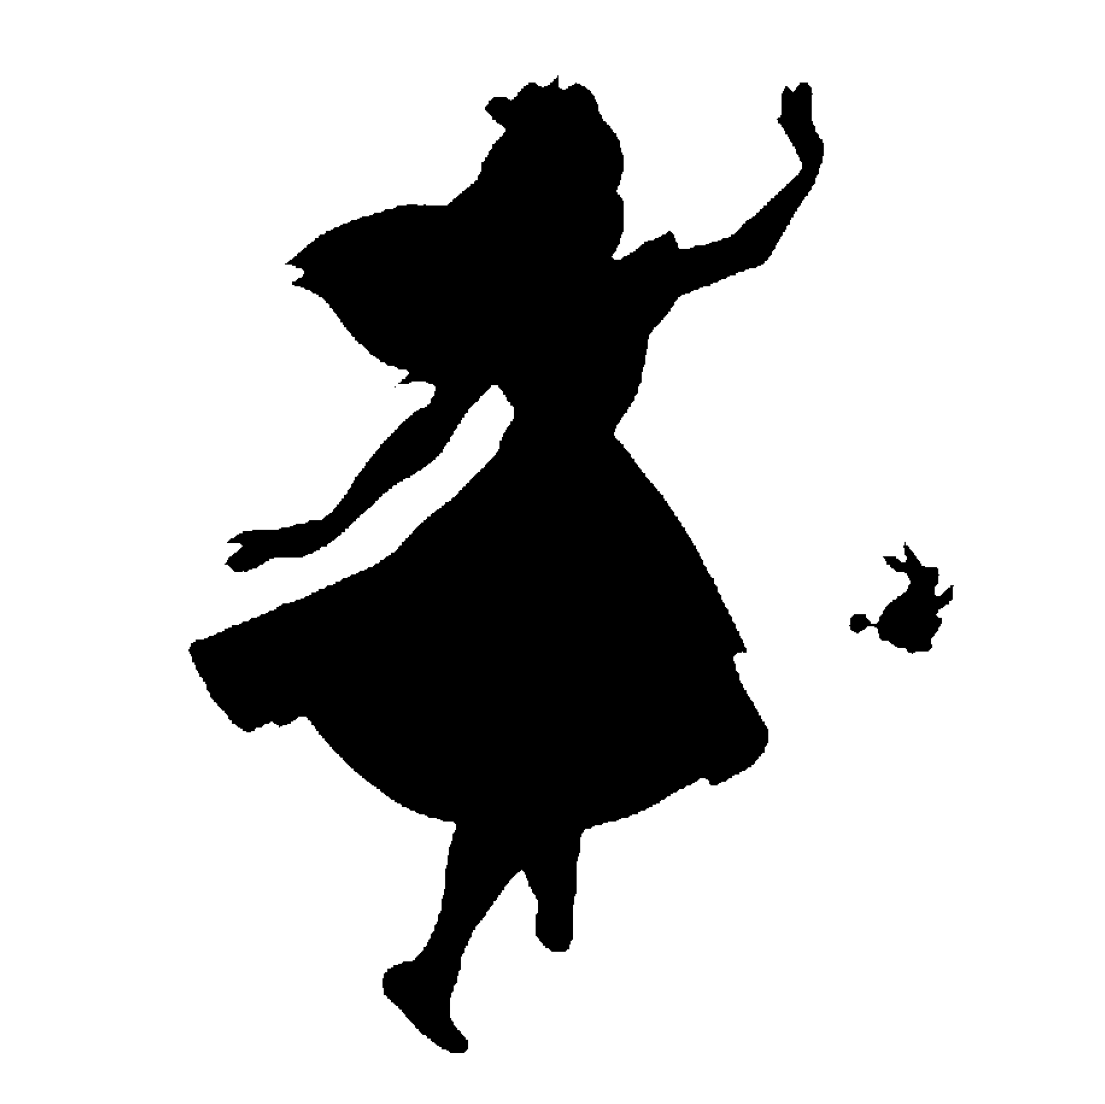

In [30]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [31]:
type(alice_mask)

numpy.ndarray

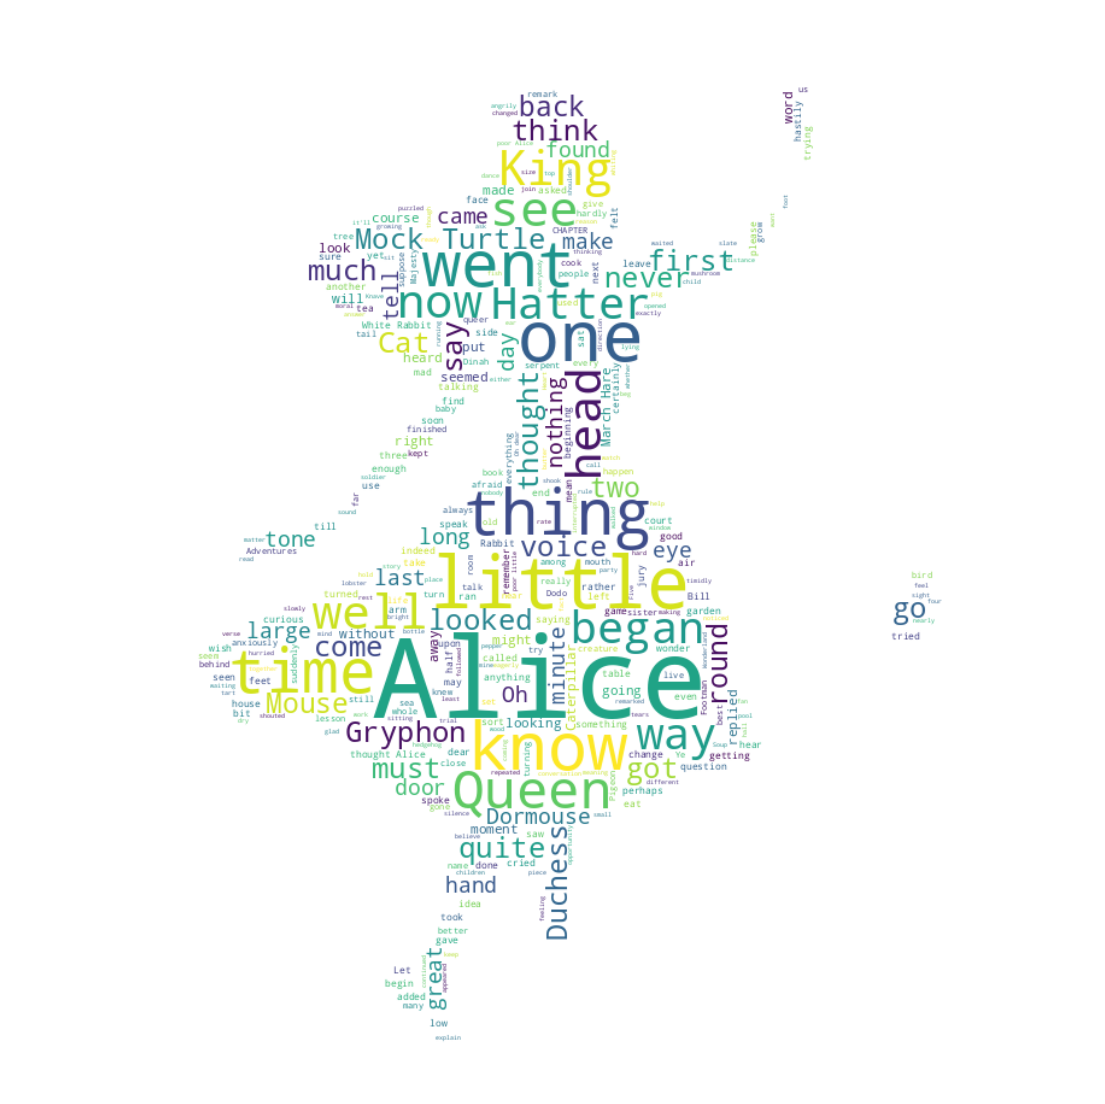

In [32]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=STOPWORDS,
    mask=alice_mask
)

alice_wc.generate(alice_novel)

fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [34]:
total_immigration = df_can["Total"].sum()
total_immigration

6409153

In [35]:
max_words = 90
countries = []
for country in df_can.index:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, "Total"] / total_immigration * max_words)
        countries.extend([country] * repeat_num_times)

word_string = " ".join(countries)
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania'

In [36]:
canada_wc = WordCloud(background_color="white").generate(word_string)

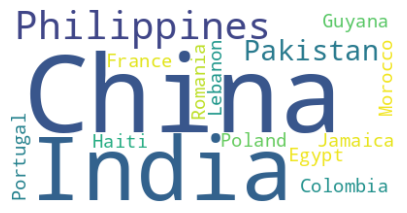

In [37]:
fig = plt.figure(figsize=(5, 8))

plt.imshow(canada_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Regression Plots**

In [38]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ["years", "total"]

df_tot.head()

,years,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


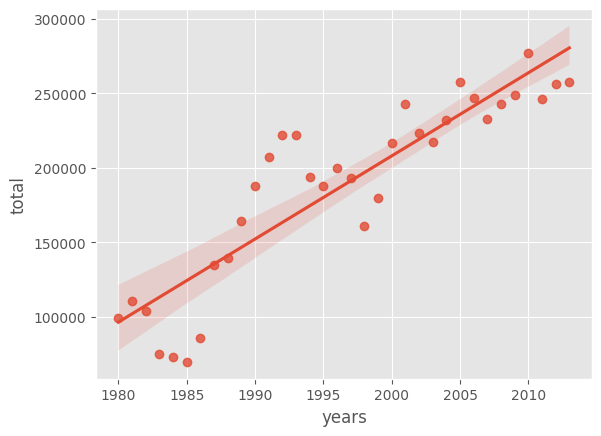

In [39]:
sns.regplot(
    data=df_tot,
    x="years",
    y="total",
)

plt.show()

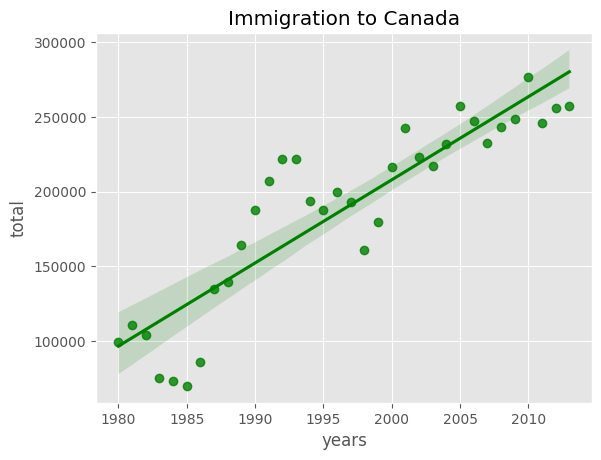

In [40]:
ax = sns.regplot(
    data=df_tot,
    x="years",
    y="total",
    color="green",
)

ax.set_title("Immigration to Canada")

plt.show()

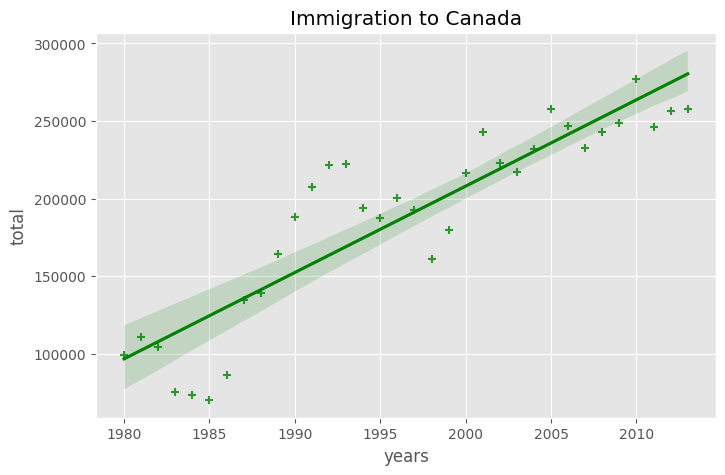

In [41]:
plt.figure(figsize=(8, 5))

ax = sns.regplot(
    data=df_tot,
    x="years",
    y="total",
    color="green",
    marker="+"
)

ax.set_title("Immigration to Canada")

plt.show()

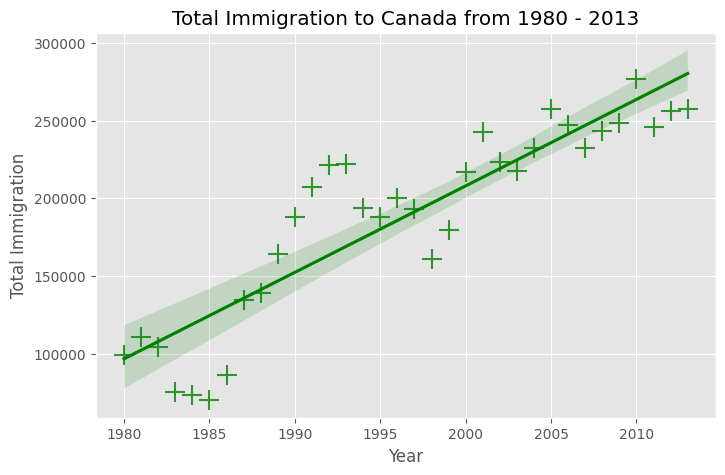

In [42]:
plt.figure(figsize=(8, 5))

ax = sns.regplot(
    data=df_tot,
    x="years",
    y="total",
    color="green",
    marker="+",
    scatter_kws={"s": 200}
)

ax.set_title("Total Immigration to Canada from 1980 - 2013")
ax.set_xlabel("Year")
ax.set_ylabel("Total Immigration")

plt.show()

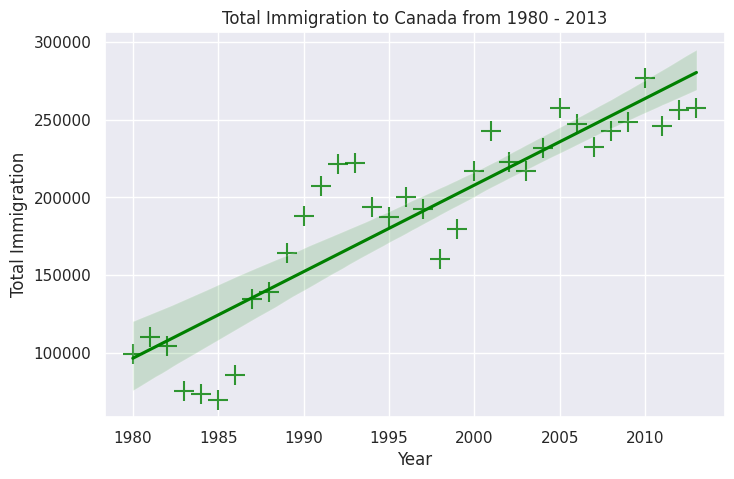

In [43]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.0)

ax = sns.regplot(
    data=df_tot,
    x="years",
    y="total",
    color="green",
    marker="+",
    scatter_kws={"s": 200}
)

ax.set_title("Total Immigration to Canada from 1980 - 2013")
ax.set_xlabel("Year")
ax.set_ylabel("Total Immigration")

plt.show()

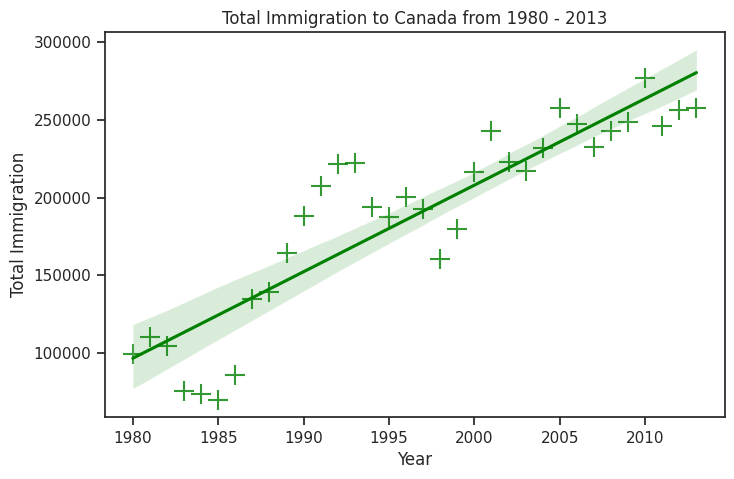

In [44]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.0)
sns.set_style("ticks")

ax = sns.regplot(
    data=df_tot,
    x="years",
    y="total",
    color="green",
    marker="+",
    scatter_kws={"s": 200}
)

ax.set_title("Total Immigration to Canada from 1980 - 2013")
ax.set_xlabel("Year")
ax.set_ylabel("Total Immigration")

plt.show()

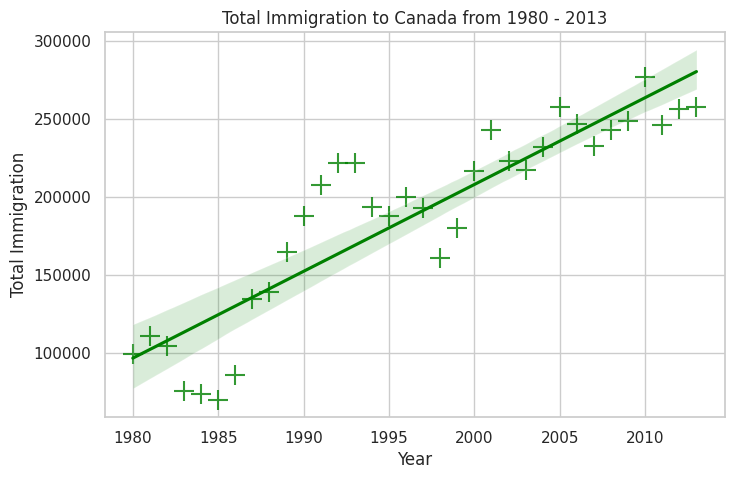

In [45]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.0)
sns.set_style("whitegrid")

ax = sns.regplot(
    data=df_tot,
    x="years",
    y="total",
    color="green",
    marker="+",
    scatter_kws={"s": 200}
)

ax.set_title("Total Immigration to Canada from 1980 - 2013")
ax.set_xlabel("Year")
ax.set_ylabel("Total Immigration")

plt.show()

In [46]:
df_dsn_tot = pd.DataFrame(df_dsn[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_dsn_tot.index = map(int, df_dsn_tot.index)

# reset the index to put in back in as a column in the df_dsn_tot dataframe
df_dsn_tot.reset_index(inplace=True)

# rename columns
df_dsn_tot.columns = ["years", "total"]

df_dsn_tot.head()

,years,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


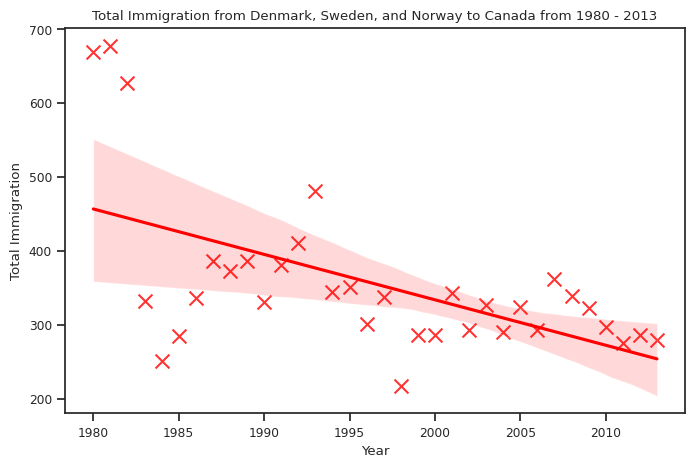

In [47]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=0.8)
sns.set_style("ticks")

ax = sns.regplot(
    data=df_dsn_tot,
    x="years",
    y="total",
    color="red",
    marker="x",
    scatter_kws={"s": 100}
)

ax.set_title("Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013")
ax.set_xlabel("Year")
ax.set_ylabel("Total Immigration")

plt.show()

## **Folium**

In [48]:
world_map = folium.Map()

world_map

In [49]:
# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

# display world map
world_map

In [50]:
# define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

# display world map
world_map

In [51]:
### type your answer here
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
# display world map
world_map

In [52]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Toner')

# display map
world_map

In [53]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')

# display map
world_map

## **Maps with Markers**

In [54]:
url_incidents = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv'
df_incidents = pd.read_csv(url_incidents)

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [55]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [56]:
df_incidents.shape

(150500, 13)

In [57]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [58]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [59]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [60]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

In [61]:
for lat, lng in df_incidents["Location"].apply(eval):
    print(lat, lng)
    break

37.775420706711 -122.403404791479


In [62]:
help(incidents.add_child)

Help on method add_child in module branca.element:

add_child(child, name=None, index=None) method of folium.map.FeatureGroup instance
    Add a child.



In [63]:
for lat, lng in zip(df_incidents["Y"], df_incidents["X"]):
    incidents.add_child(
        folium.CircleMarker(
            location=(lat, lng),
            radius=5,
            color="yellow",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6,
        )

    )

In [64]:
sanfran_map.add_child(incidents)

In [65]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.loc[:50, "Y"], df_incidents.loc[:50, "X"]):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.loc[:50, "Y"])
longitudes = list(df_incidents.loc[:50, "X"])
labels = list(df_incidents.loc[:50, "Category"])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# add incidents to map
sanfran_map.add_child(incidents)

In [66]:
df_can.reset_index(inplace=True)

In [67]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [68]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json -O data/world_countries.json

print('GeoJSON file downloaded!')

data/world_countries.json: No such file or directory
GeoJSON file downloaded!


In [69]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
